In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math  
import pandas as pd
import os
import pickle


In [29]:
dat_file = "./data/magnetization_curves_L9_T0.1.dat"   

with open(dat_file, 'r') as file:
    text = file.read()
    print(text)

# Error bars are typically smaller than the symbol size and therefore are omitted.

# ================
# kagome L = 9
# hz/J = 3.0
# T/J = 0.1
# ================
# transverse field | magn_z | magn_x | energy per site | classical bond energy per site
0.02900000  0.33330173  0.01580924  -1.33359798  -0.333234
0.05700000  0.33320809  0.03100830  -1.33435376  -0.332962
0.08600000  0.33304709  0.04628600  -1.33558992  -0.332468
0.11400000  0.33282174  0.05950842  -1.33697146  -0.331722
0.14300000  0.33251964  0.07382380  -1.33889557  -0.33078
0.17100000  0.33215671  0.08772252  -1.34111632  -0.329646
0.20000000  0.33171094  0.10168296  -1.34371005  -0.328241
0.22900000  0.33122178  0.11619107  -1.34683179  -0.326559
0.25700000  0.33070448  0.13095319  -1.35036019  -0.324592
0.28600000  0.33008213  0.14558927  -1.35427689  -0.322392
0.31400000  0.32944946  0.15954079  -1.35837880  -0.319935
0.34300000  0.32873705  0.17560609  -1.36340205  -0.316958
0.37100000  0.32798610  0.19058024  -1.3685

In [34]:
ary = text.split('\n')
hoverJ = []
indices = []
plot_list_x = []
plot_list_y = []
for i in range(len(ary)):
    if ary[i][0:6] == "# hz/J":
        hoverJ.append(ary[i].split(' ')[3])
        #temps.append(ary[i])
        indices.append(i)
indices.append(len(ary))
print(indices)
print(hoverJ)

[4, 47, 91, 135, 178, 221, 250]
['3.0', '2.4', '2.0', '1.6', '1.2', '0.8']


Range of h/J for our graphs (QA):

hoverj_zoom = [0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75]

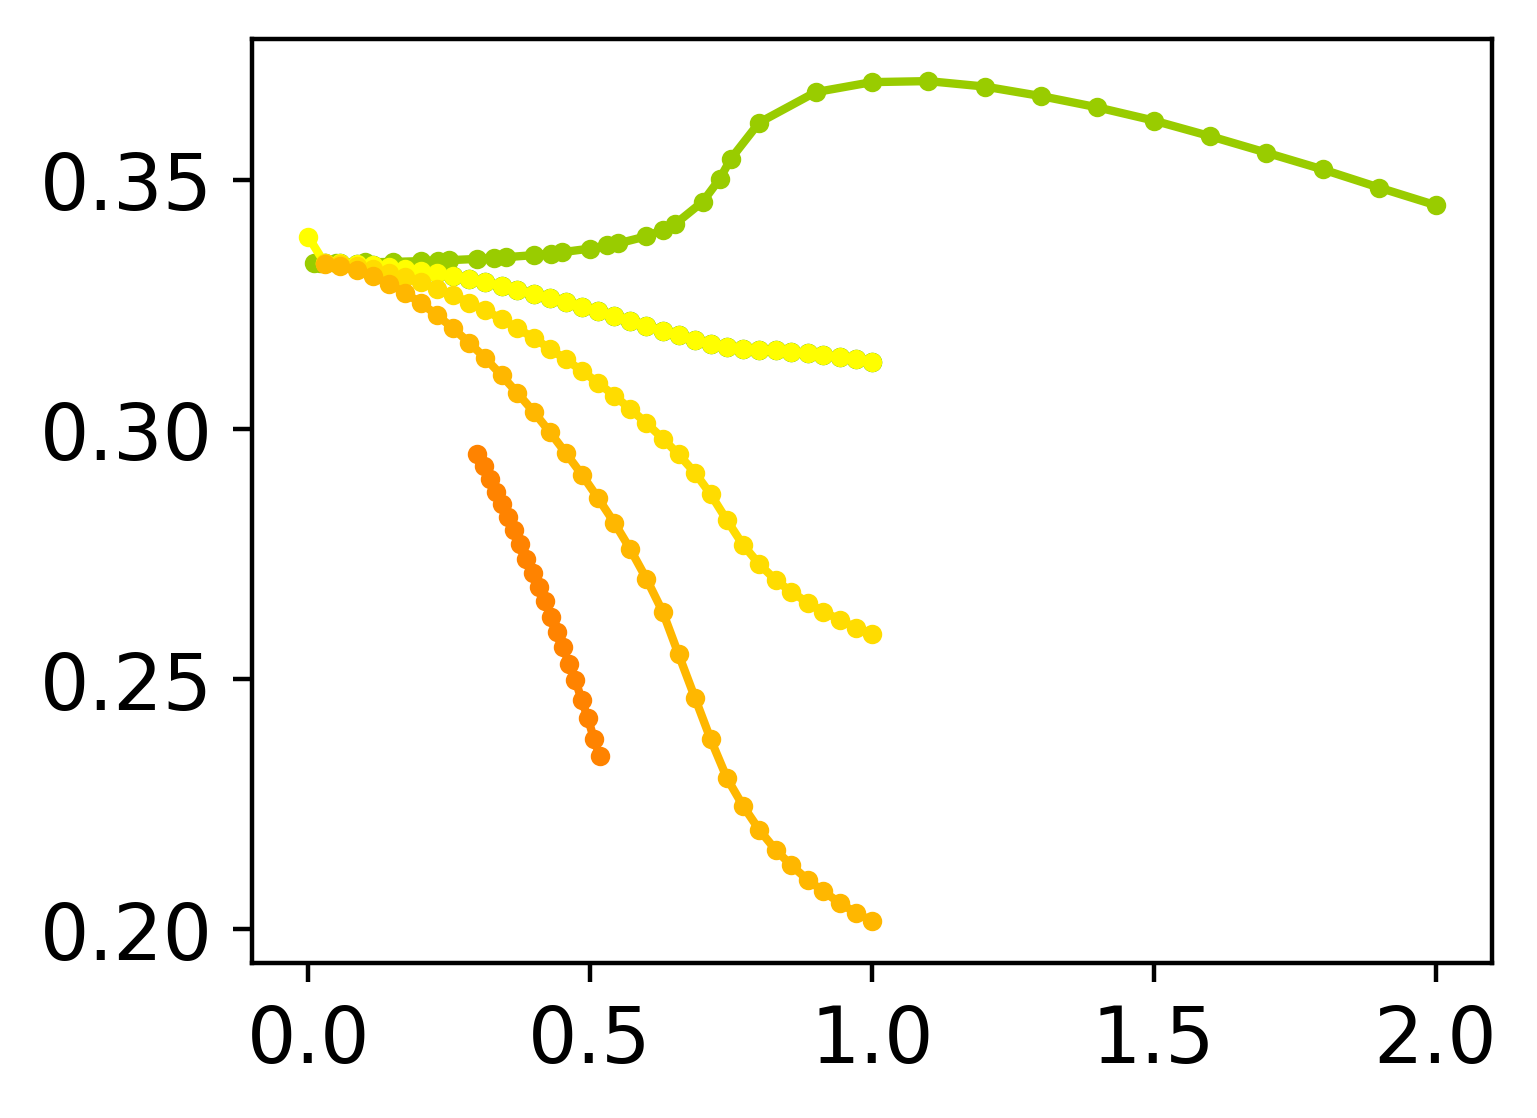

In [38]:
import matplotlib.colors as mc
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)

plt.rcParams['figure.dpi'] = 400
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(4, 3))

for j in range(len(hoverJ)):
    all_vals = ary[(indices[j] + 4):(indices[j+1]-4)]
    plot_ind = 1
    #1 is m_z
    #2 is m_x
    #3 is energy
    #4 is bond energy

    plot_list_x = []
    plot_list_y = []
    for k in range(len(all_vals)):
        plot_list_x.append(float(all_vals[k].split(' ')[0])) #that's gamma/J
        plot_list_y.append(float(all_vals[k].split(' ')[2*plot_ind]))

    plt.plot(plot_list_x, plot_list_y, '.-', ms = 5, color = cmap(float(hoverJ[j])/4.5))

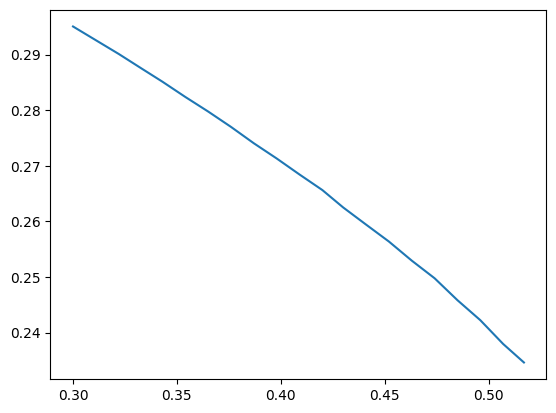

In [26]:
plt.plot(plot_list_x, plot_list_y)

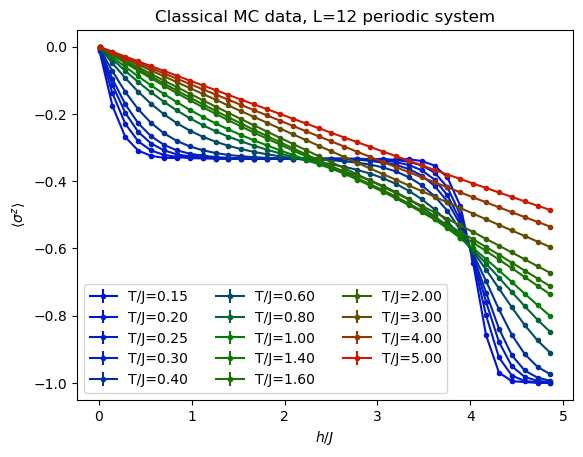

In [47]:
import matplotlib.colors as mc
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)

for j in range(2,len(temps)-1):

    tarr = ary[(indices[j]+1):(indices[j+1]-2)]
    plot_list_x = []
    plot_list_y = []
    plot_list_y_err = []
    for k in range(len(tarr)):
        plot_list_x.append(float(tarr[k].split(' ')[0]))
        plot_list_y.append(float(tarr[k].split(' ')[1]))
        err = float(tarr[k].split(' ')[2])
        if math.isnan(err):
            plot_list_y_err.append(0.0)
        else:
            plot_list_y_err.append(err)

    plt.errorbar(plot_list_x, plot_list_y, yerr = np.array(plot_list_y_err), label = 'T/J=' + temps[j], fmt = 'o-', color = cmap(float(temps[j])/6.0),markersize = 3)
plt.xlabel(r'$h/J$')
plt.ylabel(r'$\langle \sigma^z \rangle$')
plt.legend(ncol = 3)
plt.title("Classical MC data, L=12 periodic system")
plt.show()
    

[]

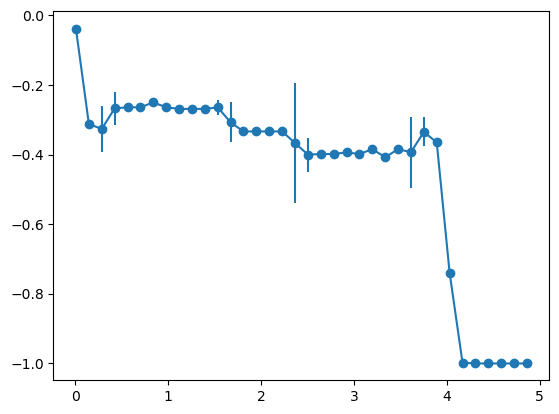

In [36]:
plt.errorbar(plot_list_x, plot_list_y, yerr = 100*np.array(plot_list_y_err), label = 'T/J=' + temps[0], fmt = 'o-')
plt.plot()